# Gesture Phase Detection using Unsupervised and Supervised Learning

In [ ]:
%matplotlib inline
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# read .csv from provided dataset
csv_filename01="Dataset/a1_raw.csv"
csv_filename02="Dataset/a1_va3.csv"
csv_filename03="Dataset/a2_raw.csv"
csv_filename04="Dataset/a2_va3.csv"
csv_filename05="Dataset/a3_raw.csv"
csv_filename06="Dataset/a3_va3.csv"

csv_filename07="Dataset/b1_raw.csv"
csv_filename08="Dataset/b1_va3.csv"
csv_filename09="Dataset/b3_raw.csv"
csv_filename10="Dataset/b3_va3.csv"

csv_filename11="Dataset/c1_raw.csv"
csv_filename12="Dataset/c1_va3.csv"
csv_filename13="Dataset/c3_raw.csv"
csv_filename14="Dataset/c3_va3.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df1=pd.read_csv("Dataset/a1_raw.csv" , skiprows=[1,2,3,4])
df2=pd.read_csv("Dataset/a1_va3.csv")
df3=pd.read_csv("Dataset/a2_raw.csv" , skiprows=[1,2,3,4])
df4=pd.read_csv("Dataset/a2_va3.csv")
df5=pd.read_csv("Dataset/a3_raw.csv ", skiprows=[1,2,3,4])
df6=pd.read_csv("Dataset/a3_va3.csv")
df7=pd.read_csv("Dataset/b1_raw.csv ", skiprows=[1,2,3,4])
df8=pd.read_csv("Dataset/b1_va3.csv")
df9=pd.read_csv("Dataset/b3_raw.csv ", skiprows=[1,2,3,4])
df10=pd.read_csv(csv_filename10)
df11=pd.read_csv(csv_filename11 , skiprows=[1,2,3,4])
df12=pd.read_csv(csv_filename12)
df13=pd.read_csv(csv_filename13 , skiprows=[1,2,3,4])
df14=pd.read_csv(csv_filename14)

In [3]:
df1.drop('timestamp',axis=1,inplace=True)
df1.drop('phase',axis=1,inplace=True)
df3.drop('timestamp',axis=1,inplace=True)
df3.drop('phase',axis=1,inplace=True)
df5.drop('timestamp',axis=1,inplace=True)
df5.drop('phase',axis=1,inplace=True)
df7.drop('timestamp',axis=1,inplace=True)
df7.drop('phase',axis=1,inplace=True)
df9.drop('timestamp',axis=1,inplace=True)
df9.drop('phase',axis=1,inplace=True)
df11.drop('timestamp',axis=1,inplace=True)
df11.drop('phase',axis=1,inplace=True)
df13.drop('timestamp',axis=1,inplace=True)
df13.drop('phase',axis=1,inplace=True)

In [4]:
df2.rename(columns={'Phase': 'phase'}, inplace=True)
df4.rename(columns={'Phase': 'phase'}, inplace=True)
df6.rename(columns={'Phase': 'phase'}, inplace=True)
df8.rename(columns={'Phase': 'phase'}, inplace=True)
df10.rename(columns={'Phase': 'phase'}, inplace=True)
df12.rename(columns={'Phase': 'phase'}, inplace=True)
df14.rename(columns={'Phase': 'phase'}, inplace=True)

In [5]:
p1 = pd.concat([df1,df2],axis=1)
p2 = pd.concat([df3,df4],axis=1)
p3 = pd.concat([df5,df6],axis=1)
p4 = pd.concat([df7,df8],axis=1)
p5 = pd.concat([df9,df10],axis=1)
p6 = pd.concat([df11,df12],axis=1)
p7 = pd.concat([df13,df14],axis=1)

In [6]:
df= pd.concat([p1,p2,p3,p4,p5,p6,p7])

In [7]:
df.phase.unique()

array(['D', 'P', 'S', 'H', 'R'], dtype=object)

In [8]:
# Delete the rows with label "P"
# For label-based deletion, set the index first on the dataframe:
df = df.set_index("phase")
df = df.drop(["P", 'D', 'R'], axis=0)

In [9]:
df.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,...,23,24,25,26,27,28,29,30,31,32
phase,,,,,,,,,,,,,,,,,,,,,
S,5.096925,2.944271,1.468542,4.497191,3.282783,1.486971,5.052908,1.611426,1.766621,5.066699,...,-0.001379,-0.000094,0.020988,0.010354,0.016217,0.010435,0.004264,0.001580,0.003233,0.001581
S,5.104311,2.977685,1.468042,4.571614,3.147557,1.472319,5.051867,1.607633,1.766425,5.067700,...,-0.000320,0.000211,0.019476,0.003480,0.015015,0.003467,0.000600,0.003637,0.000472,0.003643
S,5.003324,3.062721,1.465710,4.580294,3.163301,1.470020,5.049946,1.605049,1.766622,5.071926,...,-0.000588,0.000017,0.013344,0.001848,0.010395,0.001814,0.001926,0.000595,0.001460,0.000595
S,5.000243,3.087687,1.461833,4.587502,3.205599,1.463568,5.048331,1.605076,1.767081,5.071769,...,0.000594,0.000180,0.007175,0.004686,0.005124,0.004668,0.006609,0.000916,0.004991,0.000921
S,5.001687,3.138095,1.452445,4.596392,3.233689,1.456821,5.046865,1.607460,1.767541,5.073685,...,-0.002091,-0.000095,0.007819,0.003604,0.005717,0.003606,0.000238,0.002267,0.000224,0.002265


In [10]:
df = df.reset_index()

In [11]:
df.rename(columns={'Phase': 'phase'}, inplace=True)

In [12]:
df.phase.unique()

array(['S', 'H'], dtype=object)

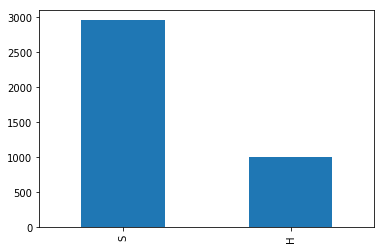

In [13]:
df['phase'].value_counts().plot(kind='bar')


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['phase'] = le.fit_transform(df['phase'])

In [15]:
df.phase.unique()

array([1, 0], dtype=int64)

In [22]:
import pandas_profiling
#df.profile_report(style={'full_width':True})
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="outputEnhanced.html")

In [23]:
df = df.sample(frac=1)

In [24]:
df.head()

,phase,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,...,23,24,25,26,27,28,29,30,31,32
938,1,4.892087,3.355297,1.454830,5.100224,3.207672,1.446455,5.400072,1.469399,1.772167,...,-5.105000e-04,0.000164,0.013418,0.015516,0.004125,0.009467,0.002045,0.001064,0.000904,0.000741
2094,1,1.748112,3.140371,1.996047,4.262886,2.421456,2.155437,2.862223,1.299156,2.221726,...,-1.309700e-04,0.000174,0.000741,0.002170,0.000273,0.001319,0.000150,0.000490,0.000047,0.000228
2697,1,4.683971,4.825652,2.139479,4.765224,4.776906,2.414154,4.700127,4.690949,2.604260,...,-1.286870e-03,0.001603,0.030807,0.041832,0.022382,0.042246,0.002244,0.002297,0.001826,0.002193
3383,0,3.687012,4.529864,1.674506,3.806406,4.358840,1.707223,4.937836,1.902022,2.146001,...,-2.776000e-05,0.000006,0.000407,0.000459,0.001703,0.000788,0.000411,0.000066,0.000100,0.000047
1616,1,2.114925,4.118919,2.232350,3.305912,0.376801,2.192362,2.314206,0.884564,2.411648,...,-5.800000e-07,0.000001,0.000246,0.000179,0.000251,0.000170,0.000016,0.000005,0.000020,0.000002


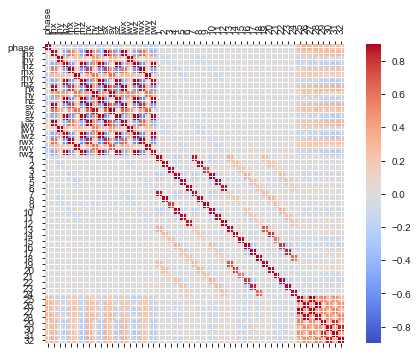

In [25]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-0.9, vmax=0.9)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

### Extracting the Feautre & Label Vector 

In [26]:
cols = list(df.columns)
features = cols
features = [e for e in features if e not in {'phase', 'X27', 'X28', 'X4', 'X5', 'X8','lhz','lwx','lwz','rhz','rwx','rwy','rwz','sx','sz'}]

In [27]:
len(features)

41

In [28]:
X = df[features]
y = df['phase']
X.head()

,lhx,lhy,rhx,rhy,hx,hy,hz,sy,lwy,1,...,23,24,25,26,27,28,29,30,31,32
938,4.892087,3.355297,5.100224,3.207672,5.400072,1.469399,1.772167,4.179574,3.420685,0.012394,...,-5.105000e-04,0.000164,0.013418,0.015516,0.004125,0.009467,0.002045,0.001064,0.000904,0.000741
2094,1.748112,3.140371,4.262886,2.421456,2.862223,1.299156,2.221726,4.084054,3.238145,0.000114,...,-1.309700e-04,0.000174,0.000741,0.002170,0.000273,0.001319,0.000150,0.000490,0.000047,0.000228
2697,4.683971,4.825652,4.765224,4.776906,4.700127,4.690949,2.604260,4.968193,4.850798,-0.021462,...,-1.286870e-03,0.001603,0.030807,0.041832,0.022382,0.042246,0.002244,0.002297,0.001826,0.002193
3383,3.687012,4.529864,3.806406,4.358840,4.937836,1.902022,2.146001,4.360622,4.287387,-0.000374,...,-2.776000e-05,0.000006,0.000407,0.000459,0.001703,0.000788,0.000411,0.000066,0.000100,0.000047
1616,2.114925,4.118919,3.305912,0.376801,2.314206,0.884564,2.411648,3.362818,3.933146,-0.000233,...,-5.800000e-07,0.000001,0.000246,0.000179,0.000251,0.000170,0.000016,0.000005,0.000020,0.000002


## Handling Imbalanced Dataset

### Perform under-sampling by generating centroids based on clustering methods. Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

### here we will resample only the majority class to be equal to the minority class which contains 998 samples.

### Therefore we got 998 cluster which means 998 sample in the majority class.

### Finally we got: 998 * 2 = 1996 total sample

In [29]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()
X, y = cc.fit_sample(X, y)
X.shape

Using TensorFlow backend.
C:\Users\Yassine\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Yassine\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Yassine\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Yassine\Anaconda3\lib\site-packages\tensorflow\python\framework\d

(1996, 41)

## Splitting into Test & Train (75:25)

### Since we are using cross validation, we don't need to divide our data into training and test sets. We want all of the data in the training set so that we can apply cross validation on that. The simplest way to do this is to set the value for the test_size parameter to 0. This will return all the data in the training set as follows:

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=25, random_state=0)

### Normalizing the Dataset for Easier Parameter Selection

In [31]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X = StandardScaler().fit_transform(X)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1971, 41) (1971,)
(25, 41) (25,)


In [34]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=41)

pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=41, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

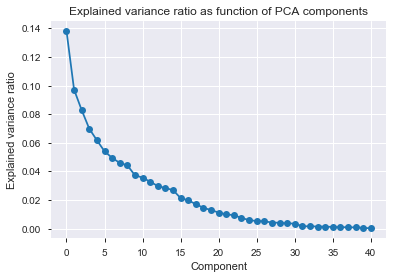

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

### Create 'reduced_data' - a Feature Dataframe containing PCA components explaining Maximum Variance

In [36]:
# We reduce the data to twenty dimensions using PCA
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#print(reduced_data[:10])  # print upto 10 elements

In [37]:
X_train.shape

(1971, 25)

# 1. SVM

In [38]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, y_train)

# Train accuracy
scores = model_selection.cross_val_score(SVM, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

[0.89620253 0.91898734 0.90126582 0.91857506 0.8956743 ]
0.9061410120140433


C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
from time import time
from sklearn.metrics import accuracy_score

# Predicting the Test set results
y_pred = SVM.predict(X_test)

tt0=time()

print ("cross result========")
#scores = model_selection.cross_val_score(SVM, X_test, y_test, cv=3)
#print(scores)
#print (scores.mean())
#print (scores.std())

print ("Acurracy: ", SVM.score(X_test,y_test) )


tt1=time()
print ("\n")
print ("time elapsed: ", tt1-tt0)
print ("\n")

cross result========
Acurracy:  0.96


time elapsed:  0.0020017623901367188




In [40]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 50, 75, 100], 'kernel': ['linear']},
              {'C': [1, 10, 50, 75, 100], 'kernel': ['rbf'], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09,0.1, 0.15, 0.2]}]
grid_search = GridSearchCV(estimator = SVM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 50, 'gamma': 0.06, 'kernel': 'rbf'}


In [41]:
# Fitting SVM to the best parameters

from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', C=50, gamma=0.06)
SVM.fit(X_train, y_train)
scores = model_selection.cross_val_score(SVM, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

[0.90379747 0.93670886 0.91392405 0.956743   0.91348601]
0.9249318774760846


In [42]:
# Testing our best SVM

print ("Acurracy: ", SVM.score(X_test,y_test) )

#scores = model_selection.cross_val_score(SVM, X_test, y_test, cv=3)
#print(scores)
#print (scores.mean())
#print (scores.std())

Acurracy:  1.0


# 2. Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(X_train, y_train)

# Train accuracy
scores = model_selection.cross_val_score(rf, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

[0.90886076 0.90632911 0.90126582 0.93384224 0.92111959]
0.9142835056527201


In [44]:
from time import time
from sklearn.metrics import accuracy_score

# Predicting the Test set results
#y_pred = rf.predict(X_test)

tt0=time()

print ("Acurracy: ", rf.score(X_test,y_test) )

#print ("cross result========")
#scores = model_selection.cross_val_score(rf, X_test, y_test, cv=3)
#print(scores)
#print (scores.mean())
#print (scores.std())

tt1=time()
print ("\n")
print ("time elapsed: ", tt1-tt0)
print ("\n")

Acurracy:  0.96


time elapsed:  0.003984689712524414




In [45]:
# Grid Search for best parameters
parameters = {
    'n_estimators': [10, 50, 100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 1000}


In [46]:
# Fitting R.F. to the best parameters
# 100 entro false
rf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', bootstrap = False)
rf.fit(X_train, y_train)

scores = model_selection.cross_val_score(rf, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

[0.90126582 0.92405063 0.92151899 0.94402036 0.9389313 ]
0.9259574193963991


In [47]:
# Testing our best R.F.

print ("Acurracy: ", rf.score(X_test,y_test))

#scores = model_selection.cross_val_score(rf, X_test, y_test, cv=3)
#print(scores)
#print (scores.mean())
#print (scores.std())

Acurracy:  1.0


# 3. ANN

In [49]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 64)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

Epoch 1/64
1971/1971 [==============================] - 32s 16ms/step - loss: 0.4992 - acc: 0.8346
Epoch 2/64
1971/1971 [==============================] - ETA: 0s - loss: 0.2715 - acc: 0.890 - 1s 357us/step - loss: 0.2702 - acc: 0.8909
Epoch 3/64
1971/1971 [==============================] - 1s 356us/step - loss: 0.2508 - acc: 0.9031
Epoch 4/64
1971/1971 [==============================] - 1s 388us/step - loss: 0.2348 - acc: 0.9122
Epoch 5/64
1971/1971 [==============================] - 1s 365us/step - loss: 0.2241 - acc: 0.9143
Epoch 6/64
1971/1971 [==============================] - 1s 445us/step - loss: 0.2154 - acc: 0.9173
Epoch 7/64
1971/1971 [==============================] - 1s 418us/step - loss: 0.2066 - acc: 0.9239
Epoch 8/64
1971/1971 [==============================] - 1s 339us/step - loss: 0.1999 - acc: 0.9224
Epoch 9/64
1971/1971 [==============================] - 1s 339us/step - loss: 0.1894 - acc: 0.9315
Epoch 10/64
1971/1971 [==============================] - 1s 347us/step 

In [50]:
test_acc = classifier.evaluate(X_test, y_test, batch_size=10, verbose=1)[1]
test_acc

25/25 [==============================] - 0s 2ms/step


0.9599999904632568

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0],
       [ 1,  9]], dtype=int64)